# EXTRA TREE CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AIR_DATA.csv')
del df['StationId']
del df['Datetime']
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [3]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.shape

(203693, 14)

In [6]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
df.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2543904,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,Poor
2543905,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,Poor
2543906,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,Poor
2543907,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,Poor
2543908,54.47,117.12,4.20,39.00,43.17,48.02,0.62,9.20,31.63,56.04,55.58,1.12,215.0,Poor


In [8]:
x1 = df.drop(labels='AQI_Bucket', axis=1)
y1 = df.loc[:,'AQI_Bucket']

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'Moderate': 88654, 'Satisfactory': 69531, 'Good': 22852, 'Poor': 11704, 'Very Poor': 9147, 'Severe': 1805})
OVER SAMPLING DATA COUNT  :  Counter({'Moderate': 88654, 'Poor': 88654, 'Very Poor': 88654, 'Satisfactory': 88654, 'Good': 88654, 'Severe': 88654})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [12]:
from sklearn.tree import ExtraTreeClassifier

In [13]:
ETC = ExtraTreeClassifier()
ETC.fit(x_train,y_train)

ExtraTreeClassifier()

In [14]:
predicted = ETC.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF SUPPORT VECTOR MACHINE:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF SUPPORT VECTOR MACHINE:


 [[17726     0     0     4     0     0]
 [   13 16276   370  1023     2    47]
 [    0     0 17722     0     0     9]
 [  178   833     9 16711     0     0]
 [    0     0     0     0 17731     0]
 [    0     0     1     0     0 17730]]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS : 97.66038445269541


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS : 2.339615547304601


In [18]:
from sklearn.metrics import classification_report
P = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER IS :\n\n",P)

THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER IS :

               precision    recall  f1-score   support

        Good       0.99      1.00      0.99     17730
    Moderate       0.95      0.92      0.93     17731
        Poor       0.98      1.00      0.99     17731
Satisfactory       0.94      0.94      0.94     17731
      Severe       1.00      1.00      1.00     17731
   Very Poor       1.00      1.00      1.00     17731

    accuracy                           0.98    106385
   macro avg       0.98      0.98      0.98    106385
weighted avg       0.98      0.98      0.98    106385



THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


[[17726     0     0     4     0     0]
 [   13 16276   370  1023     2    47]
 [    0     0 17722     0     0     9]
 [  178   833     9 16711     0     0]
 [    0     0     0     0 17731     0]
 [    0     0     1     0     0 17730]]


DISPLAY CONFUSION MATRIX : 




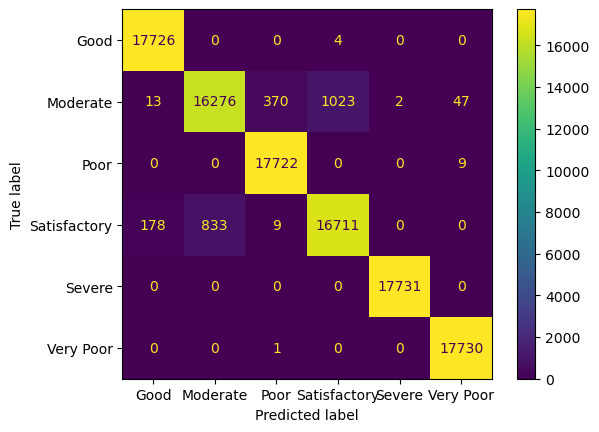

In [19]:
cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=ETC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ETC.classes_)
disp.plot()
plt.show()


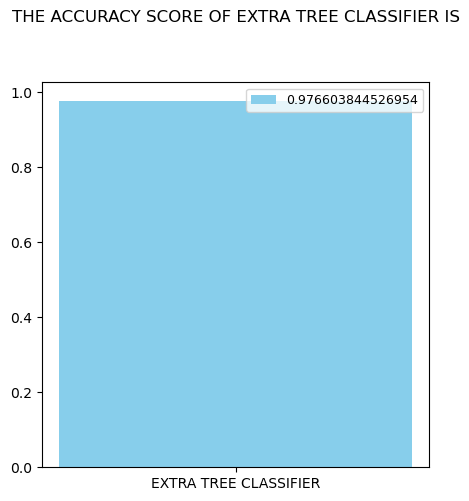

In [20]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="EXTRA TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("SKYBLUE"))
    plt.title("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()